# LIBRARIES IMPORT

In [21]:
# imports

import fig_lib 
import CNN_lib
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers, models


# DATA GENERATOR

In [22]:
# -------- DATA PARAMS --------

generate_new_data=True
    
n_recs_train,n_recs_eval=350,50
height, width = 100, 100
circles_filled=False
color=255


In [23]:
#input_d, eval_d

if generate_new_data:

    input_d=fig_lib.im_data_gen(height, width,n_recs_train,'I',cir_f=circles_filled,color=color)
    eval_d=fig_lib.im_data_gen(height, width,n_recs_eval,'I',cir_f=circles_filled,color=color)

In [24]:
print('RECORD - LABEL - SHAPE')

if generate_new_data:
    
    for R in input_d.keys():
        print(R,input_d[R]['label'],np.shape(input_d[R]['image']),type(input_d[R]['image']))

RECORD - LABEL - SHAPE
I0 line (100, 100) <class 'numpy.ndarray'>
I1 circle (100, 100) <class 'numpy.ndarray'>
I2 line (100, 100) <class 'numpy.ndarray'>
I3 circle (100, 100) <class 'numpy.ndarray'>
I4 circle (100, 100) <class 'numpy.ndarray'>
I5 circle (100, 100) <class 'numpy.ndarray'>
I6 circle (100, 100) <class 'numpy.ndarray'>
I7 circle (100, 100) <class 'numpy.ndarray'>
I8 circle (100, 100) <class 'numpy.ndarray'>
I9 circle (100, 100) <class 'numpy.ndarray'>
I10 circle (100, 100) <class 'numpy.ndarray'>
I11 line (100, 100) <class 'numpy.ndarray'>
I12 circle (100, 100) <class 'numpy.ndarray'>
I13 circle (100, 100) <class 'numpy.ndarray'>
I14 circle (100, 100) <class 'numpy.ndarray'>
I15 circle (100, 100) <class 'numpy.ndarray'>
I16 line (100, 100) <class 'numpy.ndarray'>
I17 circle (100, 100) <class 'numpy.ndarray'>
I18 circle (100, 100) <class 'numpy.ndarray'>
I19 circle (100, 100) <class 'numpy.ndarray'>
I20 line (100, 100) <class 'numpy.ndarray'>
I21 line (100, 100) <class 'num

circle


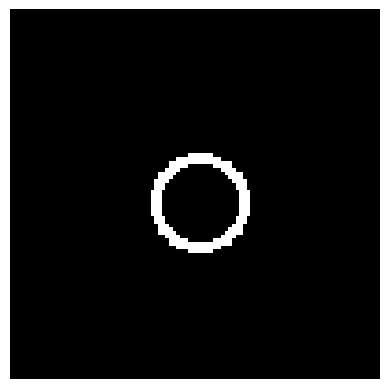

In [25]:
d_plt_check,rec_check=True,'I1'

if generate_new_data:
    
    d_plt_check,rec_check=True,'I1'
    print(input_d[rec_check]['label'])

    if d_plt_check:

        imagen = input_d[rec_check]['image']

        plt.imshow(imagen, cmap='gray')
        plt.axis('off')
        plt.show()


# CNN

### PARAMETERS

In [37]:
print('LIBRARY MODELS:')
print(' ')

for model_name in CNN_lib.MODELS.values(): print(model_name)

LIBRARY MODELS:
 
image_full_bin
image_conv_bin
image_conv_bin_augmentation


In [27]:
# -------- CNN PARAMS --------

# -------- MODEL --------

model_from_CNN_lib,mdl= False,'image_full_bin'

opt='adam'
lss='binary_crossentropy'

# -------- TRAINNING --------

epch=5


### GENERATE TRAIN DATA

In [28]:
# X_train,Y_train,X_eval,Y_eval

X_train,Y_train =CNN_lib.cnn_data_bin_gen(input_d,zero='circle', one= 'line')
X_eval,Y_eval = CNN_lib.cnn_data_bin_gen(eval_d,zero='circle', one= 'line')

print('Train data:',len(Y_train),'Evaluation data:',len(Y_eval))

Train data: 350 Evaluation data: 50


 Train data shape: (350, 100, 100)


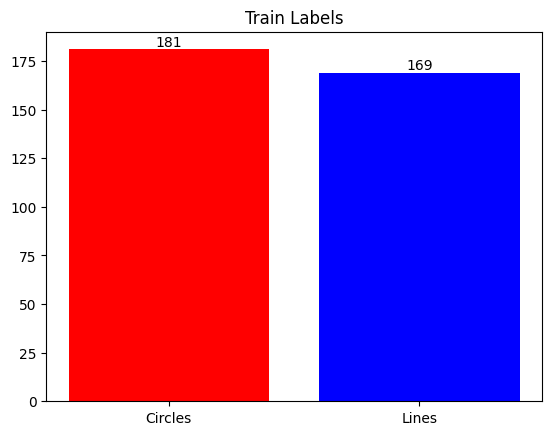

In [29]:
# check data

zeros_count = np.sum(Y_train == 0)
ones_count = np.sum(Y_train == 1)

labels = ['Circles', 'Lines']
print(' Train data shape:', np.shape(X_train))

plt.bar(labels, [zeros_count, ones_count], color=['red', 'blue'])

for i, count in enumerate([zeros_count, ones_count]):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')

plt.title('Train Labels')
plt.show()

### MODEL

In [30]:
# MODEL 

if model_from_CNN_lib:
  
  model=CNN_lib.lib_models(mdl,im_input_shp=(height, width))

else:


  data_augmentation = keras.Sequential([
                      layers.RandomFlip("horizontal",input_shape=(height, width, 1)),
                      layers.RandomRotation(0.1),
                      layers.RandomZoom(0.1),])
                            
  model = models.Sequential([
                            data_augmentation,
                            layers.Rescaling(1./255),
                            layers.Conv2D(32, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Conv2D(64, (3, 3), activation='relu'),
                            layers.MaxPooling2D((2, 2)),
                            layers.Dropout(0.2),
                            layers.Flatten(),
                            layers.Dense(64, activation='relu'),
                            layers.Dense(1, activation='sigmoid'),
                            ])

  
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (None, 100, 100, 1)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 100, 100, 1)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                 

In [31]:
model.compile(optimizer=opt, loss=lss, metrics=['accuracy'])

### TRAINNING

In [32]:
history =model.fit(X_train, Y_train, epochs=epch, validation_data=(X_eval,Y_eval))

Epoch 1/5
11/11 [==============================] - 3s 138ms/step - loss: 0.6254 - accuracy: 0.6486 - val_loss: 0.4782 - val_accuracy: 0.7600
Epoch 2/5
11/11 [==============================] - 1s 122ms/step - loss: 0.5072 - accuracy: 0.7829 - val_loss: 0.3192 - val_accuracy: 0.8400
Epoch 3/5
11/11 [==============================] - 1s 123ms/step - loss: 0.4257 - accuracy: 0.8000 - val_loss: 0.2820 - val_accuracy: 0.8600
Epoch 4/5
11/11 [==============================] - 1s 126ms/step - loss: 0.3387 - accuracy: 0.8457 - val_loss: 0.2798 - val_accuracy: 0.8800
Epoch 5/5
11/11 [==============================] - 1s 123ms/step - loss: 0.3390 - accuracy: 0.8657 - val_loss: 0.2337 - val_accuracy: 0.8800


### EVALUATE MODEL

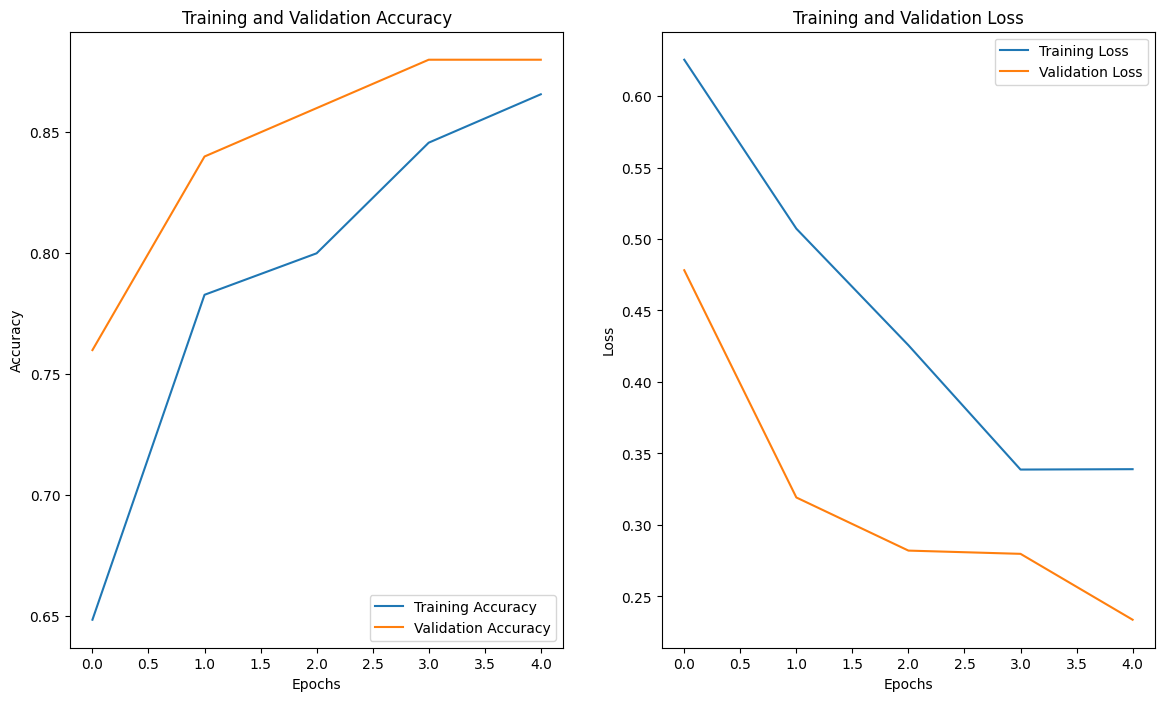

In [33]:
fg_size=(14,8)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epch)

plt.figure(figsize=fg_size)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')  
plt.ylabel('Accuracy')  

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')  
plt.ylabel('Loss')  
plt.show()

In [34]:
test_loss, test_accuracy = model.evaluate(X_eval,Y_eval,verbose=2)

print(f'Loss: {test_loss}',f'Accuracy: {test_accuracy}')

2/2 - 0s - loss: 0.2337 - accuracy: 0.8800 - 49ms/epoch - 25ms/step
Loss: 0.23368534445762634 Accuracy: 0.8799999952316284


### FORECAST

GENERATE RANDOM IMAGE

In [35]:
# generate random im

n_rdm=np.random.rand()

if n_rdm>=0.5:image,label=fig_lib.line_im(height=height, width=width,thickness=(1,3),color=color)
else:image,label=fig_lib.circle_im(height=height, width=width,thickness=(1,3),color=color,filled=circles_filled)


1/1 - 0s - 65ms/epoch - 65ms/step
Real: line ----> Forecast: line
Percentage: 98.47999811172485 %
 


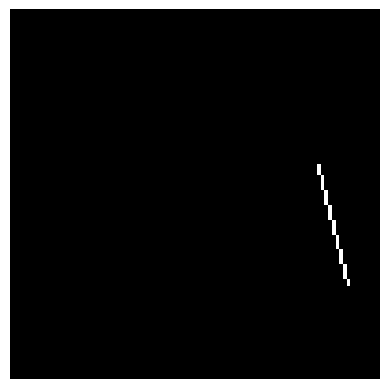

In [36]:
# Forecast

pred = model.predict(np.expand_dims(image, axis=0),verbose=2)
CNN_lib.bin_forecast(pred,label=label,up_frc='line',down_frc='circle')

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()
